In [1]:
import h5py
import scipy
import numpy as np
import torch

In [2]:
def load(path):
    path = path + "/with_imputation"
    preds = []
    for i in range(10):
        preds.append(np.load(path+"/prediction_{}.npy".format(i)))
    return np.stack(preds, axis=1)

In [3]:
base_dir = "../log/prediction/PRE/"
prediction_xg_wo = torch.from_numpy(np.load(base_dir+"XGBoost/without_imputation/prediction_0.npy", allow_pickle=True))
prediction_our = torch.from_numpy(load(base_dir+"STIMP"))
prediction_predrnn_wo = torch.from_numpy(np.load(base_dir+"PredRNN/without_imputation/prediction_0.npy", allow_pickle=True))
prediction_pde = np.load("../data/PRE/cmoms.npy")

In [4]:
label = np.load("../data/PRE/trues.npy")
label_masks = np.load("../data/PRE/true_masks.npy")
index = [46*i for i in range(306//46)]
label_masks = label_masks.squeeze()
label = label.squeeze()
label = torch.from_numpy(label)
label_masks = torch.from_numpy(label_masks)

**Fig 3i Position 1**

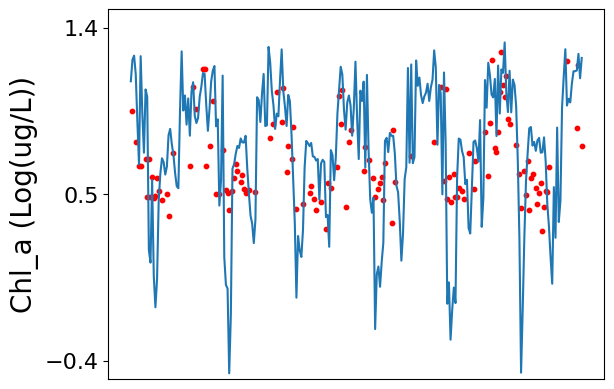

In [6]:
#CMOMS
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
n=803

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_pde[:276])
predict = predict[:,n]

plt.plot(np.arange(276), predict, label="CMOMS")

plt.ylim(-0.5,1.5)
plt.xticks([])
plt.yticks([-0.4,0.5,1.4], fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.show()

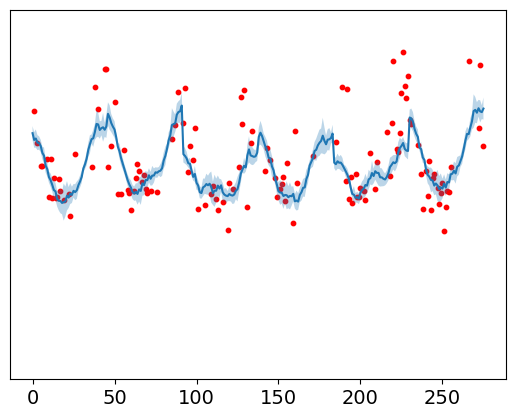

In [7]:
#STIMP
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_our[index].transpose(1,2).reshape(276,10,4443))
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(np.arange(276), mean, label="STImp")
plt.fill_between(np.arange(276), mean-std, mean+std, alpha=0.3)

plt.xticks(fontsize=14)
plt.yticks([])
plt.ylim(-0.5,1.5)
plt.show()

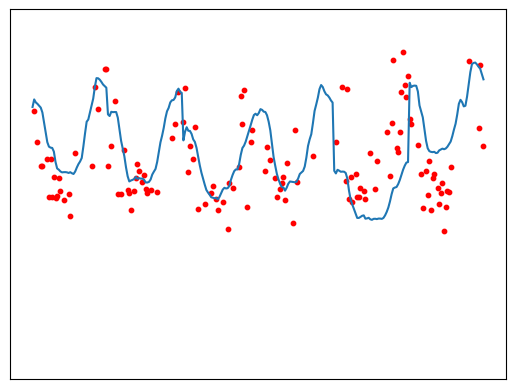

In [8]:
#PredRNN
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_predrnn_wo[index].reshape(276,4443))
predict = predict[:,n]
plt.plot(np.arange(276), predict, label="STImp")

plt.ylim(-0.5,1.5)
plt.yticks([])
plt.xticks([])
plt.show()

**Fig 3i Position 2**

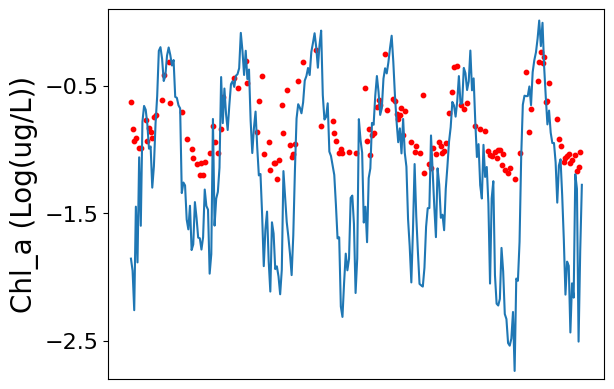

In [9]:
n=4006

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_pde[:276])
predict = predict[:,n]

plt.plot(np.arange(276), predict, label="CMOMS")

plt.ylim(-2.8,0.1)
plt.xticks([])
plt.yticks(np.arange(-2.5, 0.5, 1), fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.show()

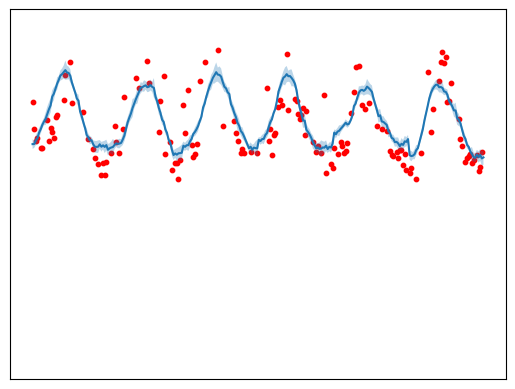

In [10]:
#STIMP
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_our[index].transpose(1,2).reshape(276,10,4443))
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(np.arange(276), mean, label="STImp")
plt.fill_between(np.arange(276), mean-std, mean+std, alpha=0.3)

# plt.legend()
plt.xticks([])
plt.yticks([])
plt.ylim(-2.8,0.1)
plt.show()

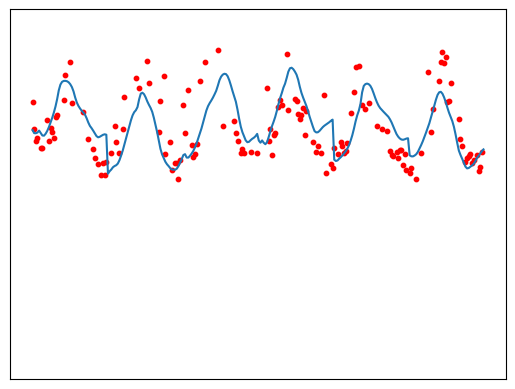

In [11]:
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_predrnn_wo[index].reshape(276,4443))
predict = predict[:,n]

plt.plot(np.arange(276), predict, label="STImp")

# plt.legend()
plt.ylim(-2.8,0.1)
plt.yticks([])
plt.xticks([])
plt.show()

**Fig 3i Position 3**

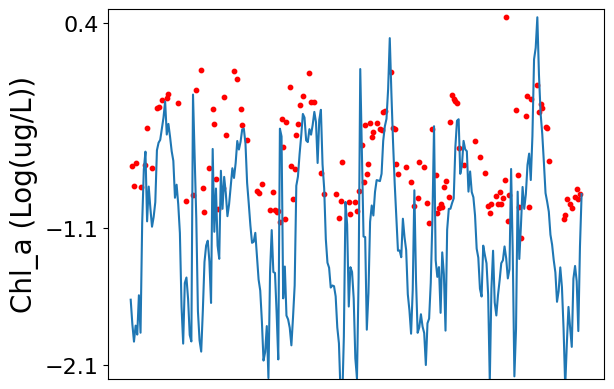

In [12]:
n=2667

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_pde[:276])
predict = predict[:,n]

plt.plot(np.arange(276), predict, label="CMOMS")

plt.ylim(-2.2,0.5)
plt.xticks([])
plt.yticks([-2.1,-1.1,0.4], fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.show()

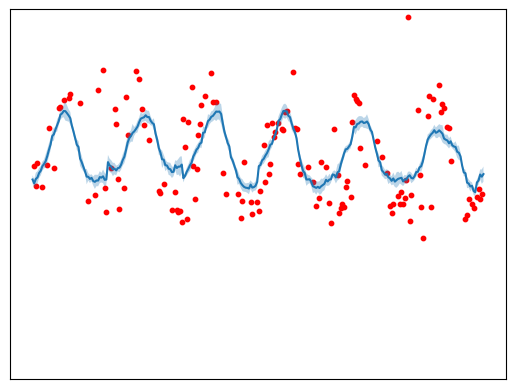

In [13]:
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_our[index].transpose(1,2).reshape(276,10,4443))
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(np.arange(276), mean, label="STImp")
plt.fill_between(np.arange(276), mean-std, mean+std, alpha=0.3)

# plt.legend()
plt.xticks([])
plt.yticks([])
plt.ylim(-2.2,0.5)
plt.show()

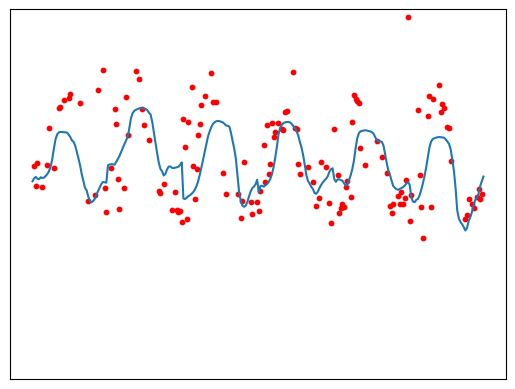

In [14]:
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_predrnn_wo[index].reshape(276,4443))
predict = predict[:,n]

plt.plot(np.arange(276), predict, label="STImp")

# plt.legend()
plt.ylim(-2.2,0.5)
plt.yticks([])
plt.xticks([])
plt.show()

**Fig 3j the third row**

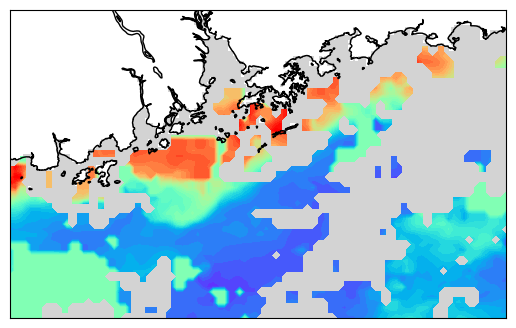

In [15]:
from mpl_toolkits import basemap
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import cartopy.crs as ccrs
from copy import deepcopy
import h5py
from numpy import meshgrid
import numpy as np

t = 43
is_sea = np.load("../data/PRE/is_sea.npy")
tmp = deepcopy(label[46,t,:])
tmp[~label_masks[0,t,:].bool()] = np.nan
ob = np.zeros((60,96))
ob[is_sea.astype(bool)] = tmp
ob[~is_sea.astype(bool)]= np.nan
lon = np.load("../data/PRE/lon.npy")
lati = np.load("../data/PRE/lati.npy")

lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, ob, levels=np.linspace(-1.5, 1.5, 40),cmap="rainbow",extend="both")

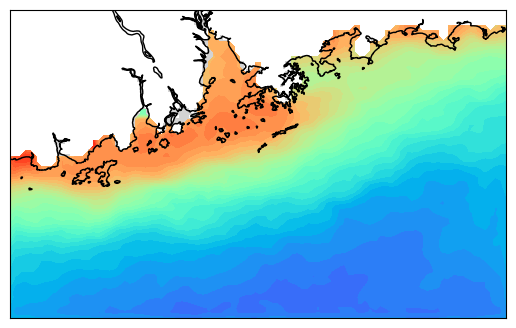

In [16]:
tmp = deepcopy(prediction_our[46,:, t,:].mean(0))
pre = np.zeros((60,96))
pre[is_sea.astype(bool)] = tmp
pre[~is_sea.astype(bool)]= np.nan


lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, pre, levels=np.linspace(-1.5, 1.5, 40),cmap="rainbow",extend='both')

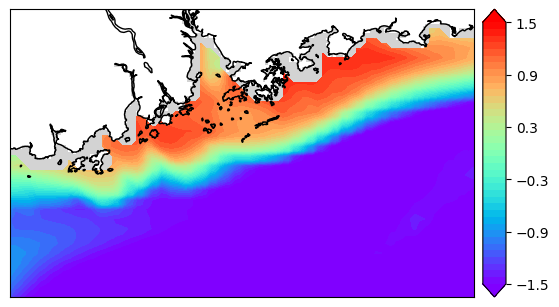

In [18]:
tmp = deepcopy(prediction_pde[46+t,:])
pre = np.zeros((60,96))
pre[is_sea.astype(bool)] = tmp
pre[~is_sea.astype(bool)]= np.nan


lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, pre, levels=np.linspace(-1.5, 1.5, 40),cmap="rainbow",extend='both')

# map.contourf(x, y, tmp2, levels=np.linspace(-1.5, 1.5, 40),cmap="Greys")
map.colorbar(boundaries=np.linspace(-1.5, 1.5, 20), ticks=np.linspace(-1.5, 1.5, 6))

**Fig 3j the first row**

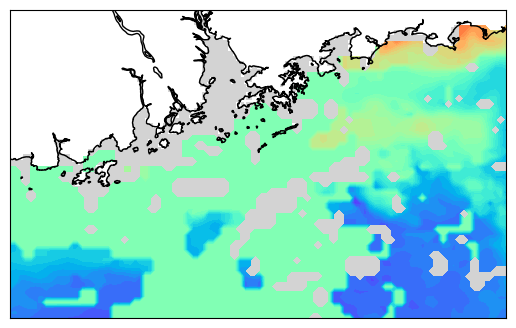

In [19]:
t = 0
is_sea = np.load("../data/PRE/is_sea.npy")
tmp = deepcopy(label[46,t,:])
tmp[~label_masks[0,t,:].bool()] = np.nan
ob = np.zeros((60,96))
ob[is_sea.astype(bool)] = tmp
ob[~is_sea.astype(bool)]= np.nan
lon = np.load("../data/PRE/lon.npy")
lati = np.load("../data/PRE/lati.npy")

lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, ob, levels=np.linspace(-1.5, 1.5, 40),cmap="rainbow",extend="both")

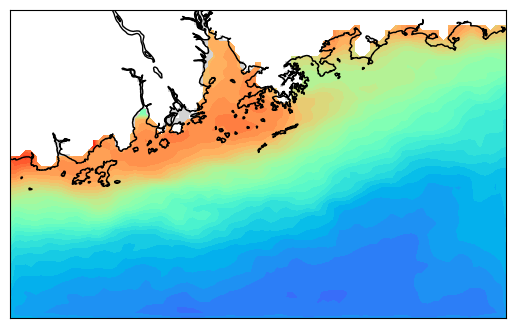

In [20]:
tmp = deepcopy(prediction_our[46,:, t,:].mean(0))
pre = np.zeros((60,96))
pre[is_sea.astype(bool)] = tmp
pre[~is_sea.astype(bool)]= np.nan


lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, pre, levels=np.linspace(-1.5, 1.5, 40),cmap="rainbow",extend='both')

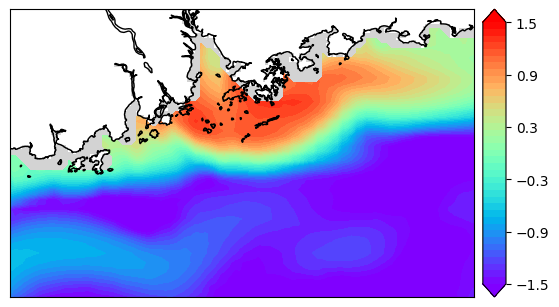

In [21]:
tmp = deepcopy(prediction_pde[46+t,:])
pre = np.zeros((60,96))
pre[is_sea.astype(bool)] = tmp
pre[~is_sea.astype(bool)]= np.nan


lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, pre, levels=np.linspace(-1.5, 1.5, 40),cmap="rainbow",extend='both')

# map.contourf(x, y, tmp2, levels=np.linspace(-1.5, 1.5, 40),cmap="Greys")
map.colorbar(boundaries=np.linspace(-1.5, 1.5, 20), ticks=np.linspace(-1.5, 1.5, 6))

**Fig 3j the second row**

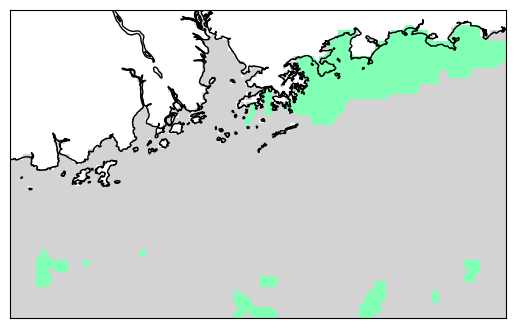

In [23]:
t = 20
is_sea = np.load("../data/PRE/is_sea.npy")
tmp = deepcopy(label[46,t,:])
tmp[~label_masks[0,t,:].bool()] = np.nan
ob = np.zeros((60,96))
ob[is_sea.astype(bool)] = tmp
ob[~is_sea.astype(bool)]= np.nan
lon = np.load("../data/PRE/lon.npy")
lati = np.load("../data/PRE/lati.npy")

lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, ob, levels=np.linspace(-1.5, 1.5, 40),cmap="rainbow",extend="both")

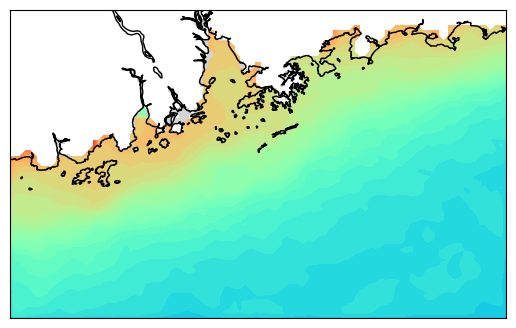

In [24]:
tmp = deepcopy(prediction_our[46,:, t,:].mean(0))
pre = np.zeros((60,96))
pre[is_sea.astype(bool)] = tmp
pre[~is_sea.astype(bool)]= np.nan


lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, pre, levels=np.linspace(-1.5, 1.5, 40),cmap="rainbow",extend='both')

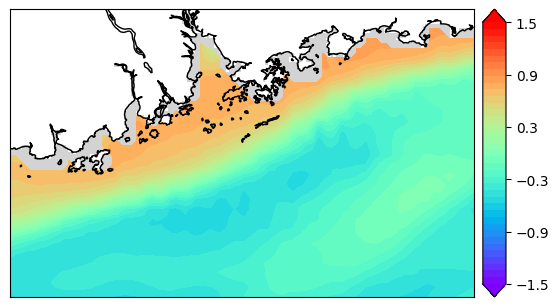

In [25]:
tmp = deepcopy(prediction_pde[46+t,:])
pre = np.zeros((60,96))
pre[is_sea.astype(bool)] = tmp
pre[~is_sea.astype(bool)]= np.nan


lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, pre, levels=np.linspace(-1.5, 1.5, 40),cmap="rainbow",extend='both')

# map.contourf(x, y, tmp2, levels=np.linspace(-1.5, 1.5, 40),cmap="Greys")
map.colorbar(boundaries=np.linspace(-1.5, 1.5, 20), ticks=np.linspace(-1.5, 1.5, 6))